<a href="https://colab.research.google.com/github/JulianCarvajal/ProyectoIA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.8 MB/s eta 0:00:00


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


## Import libraries and describe dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv', encoding = 'utf-8')
df.shape

(692500, 21)

In [ ]:
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
filas_con_nulos = df.isnull().any(axis=1).sum()
filas_con_nulos

np.int64(63604)

In [ ]:
df.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [ ]:
k = df.isna().sum()
k[k!=0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_TIENEINTERNET.1,26629


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.750,494564.500,741782.500,989286.000
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
coef_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
coef_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
coef_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
coef_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


## Funciones reutilizables

In [ ]:
from unidecode import unidecode

def clean_text(colum_name):
  df[colum_name] = (
      df[colum_name]
      .astype(str)                            # Asegura que todo sea texto
      .str.lower()                            # Convierte a minúsculas
      .str.strip()                            # Quita espacios al principio/final
      .apply(unidecode)                       # Elimina tildes
      .str.replace(r'\s+', ' ', regex=True)   # Sustituye múltiples espacios por uno solo
  )


In [ ]:
import pandas as pd
from rapidfuzz import fuzz, process
import re
from unidecode import unidecode

# --- 1. Función de Pre-procesamiento Robusto (Sin cambios, ya está en la función de limpieza) ---
def preprocesar_texto(texto):
    texto = str(texto).lower()
    texto = unidecode(texto)
    texto = re.sub(r'[^a-z0-9\s]', '', texto) # Esto maneja el '?' y otros especiales
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# --- 2. Función de Limpieza de Columna con Fuzzy Matching (MEJORADA CON DEBUG) ---
def limpiar_columna_fuzzy_debug(df, columna_a_limpiar, umbral=85):
    df_temp = df.copy()

    # Aplicar el pre-procesamiento a una nueva columna temporal
    columna_preprocesada = f"{columna_a_limpiar}_preprocesada"
    df_temp[columna_preprocesada] = df_temp[columna_a_limpiar].apply(preprocesar_texto)

    # Obtener los programas únicos de la columna pre-procesada
    programas_unicos_preproc = df_temp[columna_preprocesada].unique().tolist()

    mapeo_programas_preproc_a_canonico = {}
    programas_preproc_procesados = set()

    # Iterar sobre cada programa único pre-procesado
    for i, programa_actual_preproc in enumerate(programas_unicos_preproc):
        if programa_actual_preproc in programas_preproc_procesados:
            continue

        nombre_canonico_preproc = programa_actual_preproc
        mapeo_programas_preproc_a_canonico[programa_actual_preproc] = nombre_canonico_preproc
        programas_preproc_procesados.add(programa_actual_preproc)
        print(f"\n[{i+1}/{len(programas_unicos_preproc)}] Estableciendo canónico: '{nombre_canonico_preproc}'")

        # Busca coincidencias entre este canónico y los programas que aún no se han mapeado
        opciones_a_comparar = [p for p in programas_unicos_preproc if p not in programas_preproc_procesados]

        if not opciones_a_comparar:
            print(f"  No hay más opciones para comparar con '{nombre_canonico_preproc}'.")
            continue

        coincidencias = process.extract(
            query=programa_actual_preproc,
            choices=opciones_a_comparar,
            scorer=fuzz.token_set_ratio,
            limit=None
        )

        found_match_in_group = False
        for posible_variacion_preproc, puntuacion, _ in coincidencias:
            if puntuacion >= umbral:
                if posible_variacion_preproc not in programas_preproc_procesados:
                    mapeo_programas_preproc_a_canonico[posible_variacion_preproc] = nombre_canonico_preproc
                    programas_preproc_procesados.add(posible_variacion_preproc)
                    print(f"  -> Mapeando '{posible_variacion_preproc}' (score: {puntuacion}) a '{nombre_canonico_preproc}'")
                    found_match_in_group = True
            # DEBUG: Mostrar coincidencias cercanas pero que no cumplen el umbral
            elif puntuacion > umbral - 15: # Mostrar si la puntuación es ~15 puntos por debajo del umbral
                 print(f"  -> IGNORANDO '{posible_variacion_preproc}' (score: {puntuacion}) para '{nombre_canonico_preproc}' - Puntuación muy baja.")

        if not found_match_in_group and len(opciones_a_comparar) > 0:
            print(f"  No se encontraron coincidencias por encima del umbral={umbral} para '{nombre_canonico_preproc}' en las {len(opciones_a_comparar)} opciones restantes.")


    # --- Paso para obtener la forma ORIGINAL del nombre canónico ---
    # Crear un mapeo inverso de la forma preprocesada canónica a una de sus formas originales
    canonical_preproc_a_original_map = {}
    for original_val, preprocessed_val in df_temp[[columna_a_limpiar, columna_preprocesada]].drop_duplicates().values:
        if preprocessed_val in mapeo_programas_preproc_a_canonico:
            cleaned_preprocessed_val = mapeo_programas_preproc_a_canonico[preprocessed_val]
            if cleaned_preprocessed_val not in canonical_preproc_a_original_map:
                canonical_preproc_a_original_map[cleaned_preprocessed_val] = original_val
        else:
            # En casos muy raros donde un preprocesado no fue mapeado (debería ser handled por el 'else' del bucle)
            if preprocessed_val not in canonical_preproc_a_original_map:
                canonical_preproc_a_original_map[preprocessed_val] = original_val

    # Aplicar este mapeo para obtener la columna final limpia con nombres originales
    df_temp[f'{columna_a_limpiar}_limpio'] = df_temp[f'{columna_a_limpiar}_preprocesada'].map(mapeo_programas_preproc_a_canonico).map(canonical_preproc_a_original_map)

    # Eliminar las columnas temporales preprocesadas
    df_final = df_temp.drop(columns=[columna_preprocesada]) # Ya no necesitamos la preproc, ni la limpia_preproc

    # Construir el diccionario de mapeo final (original -> original_limpio) para el retorno
    final_mapeo_para_retornar = {}
    for original_val in df[columna_a_limpiar].unique():
        preprocessed_val = preprocesar_texto(original_val)
        if preprocessed_val in mapeo_programas_preproc_a_canonico:
            cleaned_preprocessed_val = mapeo_programas_preproc_a_canonico[preprocessed_val]
            final_mapeo_para_retornar[original_val] = canonical_preproc_a_original_map.get(cleaned_preprocessed_val, original_val)
        else:
            # Fallback en caso de que un valor original no se haya mapeado (raro)
            final_mapeo_para_retornar[original_val] = original_val

    num_unicos_final = len(df_final[f'{columna_a_limpiar}_limpio'].unique())
    # print("\n----------------------------------------------------------------------")
    # print(f"Número de programas únicos DESPUÉS de limpieza: {num_unicos_final}")
    # if num_unicos_final == len(programas_unicos_preproc):
    #     print("ADVERTENCIA: No se realizó ninguna agrupación. Considera bajar el umbral o revisar tus datos.")
    # print("----------------------------------------------------------------------")

    return df_final, final_mapeo_para_retornar

## Data Processing

### Codificación de variables categóricas

#### Rendimiento

In [ ]:
for i in df['RENDIMIENTO_GLOBAL'].unique():
  print(i)

medio-alto
bajo
alto
medio-bajo


In [ ]:
maped_performance_values = {'bajo': 1, 'medio-bajo':2, 'medio-alto':3, 'alto':4}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(maped_performance_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,1,0.132,0.426,0.261,0.328


#### Familia con internet

In [ ]:
for i in df['FAMI_TIENEINTERNET'].unique():
  print(i)

Si
No
nan


In [ ]:
maped_internet_values = {'Si': 1, 'No':0}
df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map(maped_internet_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1.0,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0.0,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1.0,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1.0,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,0.0,Primaria completa,No,...,N,Si,Si,No,Primaria completa,1,0.132,0.426,0.261,0.328


#### Familia con internet (Columna repetida con "si" y "no" cómo respuesta)

In [ ]:
for i in df['FAMI_TIENEINTERNET.1'].unique():
  print(i)

Si
No
nan


In [ ]:
maped_network_values = {'No': 0,
                    'Si': 1}
df['FAMI_TIENEINTERNET.1'] = df['FAMI_TIENEINTERNET.1'].map(maped_network_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1.0,Técnica o tecnológica incompleta,Si,...,N,No,Si,1.0,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0.0,Técnica o tecnológica completa,Si,...,N,No,Si,0.0,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,No,No,1.0,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1.0,No sabe,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1.0,Primaria completa,Si,...,N,No,Si,1.0,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Primaria incompleta,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,0.0,Primaria completa,No,...,N,Si,Si,0.0,Primaria completa,1,0.132,0.426,0.261,0.328


#### Valor matrícula

In [ ]:
for i in df['ESTU_VALORMATRICULAUNIVERSIDAD'].unique():
  print(i)

Entre 5.5 millones y menos de 7 millones
Entre 2.5 millones y menos de 4 millones
Entre 4 millones y menos de 5.5 millones
Más de 7 millones
Entre 1 millón y menos de 2.5 millones
Entre 500 mil y menos de 1 millón
Menos de 500 mil
No pagó matrícula
nan


In [ ]:
maped_tuition_values = {'No pagó matrícula': 0,
                        'Menos de 500 mil':1,
                        'Entre 500 mil y menos de 1 millón':2,
                        'Entre 1 millón y menos de 2.5 millones':3,
                        'Entre 2.5 millones y menos de 4 millones':4,
                        'Entre 4 millones y menos de 5.5 millones':5,
                        'Entre 5.5 millones y menos de 7 millones':6,
                        'Más de 7 millones':7}
df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(maped_tuition_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,Menos de 10 horas,Estrato 3,1.0,Técnica o tecnológica incompleta,Si,...,N,No,Si,1.0,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0,Estrato 3,0.0,Técnica o tecnológica completa,Si,...,N,No,Si,0.0,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,Más de 30 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,No,No,1.0,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0,Estrato 4,1.0,No sabe,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,Entre 21 y 30 horas,Estrato 3,1.0,Primaria completa,Si,...,N,No,Si,1.0,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,Entre 11 y 20 horas,Estrato 2,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,Más de 30 horas,Estrato 3,1.0,Primaria incompleta,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,Menos de 10 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,Menos de 10 horas,Estrato 1,0.0,Primaria completa,No,...,N,Si,Si,0.0,Primaria completa,1,0.132,0.426,0.261,0.328


#### Horas de trabajo semanales

In [ ]:
for i in df['ESTU_HORASSEMANATRABAJA'].unique():
  print(i)

Menos de 10 horas
0
Más de 30 horas
Entre 21 y 30 horas
Entre 11 y 20 horas
nan


In [ ]:
maped_working_values = {'0': 0,
                        'Menos de 10 horas':1,
                        'Entre 11 y 20 horas':2,
                        'Entre 21 y 30 horas':3,
                        'Más de 30 horas':4}
df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].map(maped_working_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,Estrato 3,1.0,Técnica o tecnológica incompleta,Si,...,N,No,Si,1.0,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,Estrato 3,0.0,Técnica o tecnológica completa,Si,...,N,No,Si,0.0,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,No,No,1.0,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,Estrato 4,1.0,No sabe,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,Estrato 3,1.0,Primaria completa,Si,...,N,No,Si,1.0,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,Estrato 2,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,Estrato 3,1.0,Primaria incompleta,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,Estrato 3,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,Estrato 1,0.0,Primaria completa,No,...,N,Si,Si,0.0,Primaria completa,1,0.132,0.426,0.261,0.328


#### Estrato

In [ ]:
for i in df['FAMI_ESTRATOVIVIENDA'].unique():
  print(i)

Estrato 3
Estrato 4
Estrato 5
Estrato 2
Estrato 1
nan
Estrato 6
Sin Estrato


In [ ]:
maped_estrato_values = {'0': 0,
                        'Estrato 1':1,
                        'Estrato 2':2,
                        'Estrato 3':3,
                        'Estrato 4':4,
                        'Estrato 5':5,
                        'Estrato 6':6}
df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map(maped_estrato_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,Técnica o tecnológica incompleta,Si,...,N,No,Si,1.0,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,Técnica o tecnológica completa,Si,...,N,No,Si,0.0,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,Secundaria (Bachillerato) completa,Si,...,N,No,No,1.0,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,No sabe,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,Primaria completa,Si,...,N,No,Si,1.0,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,Primaria incompleta,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,Primaria completa,No,...,N,Si,Si,0.0,Primaria completa,1,0.132,0.426,0.261,0.328


#### Educación padre

In [ ]:
for i in df['FAMI_EDUCACIONPADRE'].unique():
  print(i)

Técnica o tecnológica incompleta
Técnica o tecnológica completa
Secundaria (Bachillerato) completa
No sabe
Primaria completa
Educación profesional completa
Educación profesional incompleta
Primaria incompleta
Postgrado
nan
Secundaria (Bachillerato) incompleta
Ninguno
No Aplica


In [ ]:
maped_education_values = {'Ninguno': 0,
                        'Primaria incompleta':1,
                        'Primaria completa':2,
                        'Secundaria (Bachillerato) incompleta':3,
                        'Secundaria (Bachillerato) completa':4,
                        'Técnica o tecnológica incompleta':5,
                        'Técnica o tecnológica completa':6,
                        'Educación profesional incompleta':7,
                        'Educación profesional completa':8,
                        'Postgrado':9}
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].map(maped_education_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,Si,...,N,No,Si,1.0,Postgrado,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,Si,...,N,No,Si,0.0,Técnica o tecnológica incompleta,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,Si,...,N,No,No,1.0,Secundaria (Bachillerato) completa,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) completa,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,Si,...,N,No,Si,1.0,Primaria completa,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,Si,...,N,No,Si,1.0,Secundaria (Bachillerato) incompleta,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,Si,...,N,Si,Si,1.0,Secundaria (Bachillerato) incompleta,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,No,...,N,Si,Si,0.0,Primaria completa,1,0.132,0.426,0.261,0.328


#### Educación madre

In [ ]:
for i in df['FAMI_EDUCACIONMADRE'].unique():
  print(i)

Postgrado
Técnica o tecnológica incompleta
Secundaria (Bachillerato) completa
Primaria completa
Técnica o tecnológica completa
Secundaria (Bachillerato) incompleta
Educación profesional incompleta
Educación profesional completa
Primaria incompleta
nan
Ninguno
No Aplica
No sabe


In [ ]:
maped_education_values = {'Ninguno': 0,
                        'Primaria incompleta':1,
                        'Primaria completa':2,
                        'Secundaria (Bachillerato) incompleta':3,
                        'Secundaria (Bachillerato) completa':4,
                        'Técnica o tecnológica incompleta':5,
                        'Técnica o tecnológica completa':6,
                        'Educación profesional incompleta':7,
                        'Educación profesional completa':8,
                        'Postgrado':9}
df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].map(maped_education_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,Si,...,N,No,Si,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,Si,...,N,No,Si,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,Si,...,N,No,No,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,Si,...,N,No,Si,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,Si,...,N,No,Si,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,Si,...,N,Si,Si,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,Si,...,N,No,Si,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,Si,...,N,Si,Si,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,No,...,N,Si,Si,0.0,2.0,1,0.132,0.426,0.261,0.328


#### Tiene lavadora

In [ ]:
for i in df['FAMI_TIENELAVADORA'].unique():
  print(i)

Si
No
nan


In [ ]:
maped_washing_values = {'No': 0,
                        'Si': 1}
df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].map(maped_washing_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,1.0,...,N,No,Si,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,1.0,...,N,No,Si,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,1.0,...,N,No,No,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,1.0,...,N,No,Si,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,1.0,...,N,No,Si,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,1.0,...,N,Si,Si,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,1.0,...,N,No,Si,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,1.0,...,N,Si,Si,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,0.0,...,N,Si,Si,0.0,2.0,1,0.132,0.426,0.261,0.328


#### Tiene automovil

In [ ]:
for i in df['FAMI_TIENEAUTOMOVIL'].unique():
  print(i)

Si
No
nan


In [ ]:
maped_car_values = {'No': 0,
                    'Si': 1}
df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].map(maped_car_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,1.0,...,N,No,Si,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,1.0,...,N,No,Si,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,1.0,...,N,No,No,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,1.0,...,N,No,Si,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,1.0,...,N,No,Si,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,1.0,...,N,Si,Si,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,1.0,...,N,No,Si,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,1.0,...,N,Si,Si,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,0.0,...,N,Si,Si,0.0,2.0,1,0.132,0.426,0.261,0.328


#### Privado de la libertad

In [ ]:
for i in df['ESTU_PRIVADO_LIBERTAD'].unique():
  print(i)

N
S


In [ ]:
maped_estu_priv_values = {'N': 0,
                    'S': 1}
df['ESTU_PRIVADO_LIBERTAD'] = df['ESTU_PRIVADO_LIBERTAD'].map(maped_estu_priv_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,1.0,...,0,No,Si,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,1.0,...,0,No,Si,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,1.0,...,0,No,No,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,1.0,...,0,No,Si,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,1.0,...,0,No,Si,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,1.0,...,0,Si,Si,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,1.0,...,0,No,Si,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,1.0,...,0,Si,Si,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,0.0,...,0,Si,Si,0.0,2.0,1,0.132,0.426,0.261,0.328


#### Se paga su matrícula

In [ ]:
for i in df['ESTU_PAGOMATRICULAPROPIO'].unique():
  print(i)

No
Si
nan


In [ ]:
maped_ownpay_values = {'No': 0,
                    'Si': 1}
df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].map(maped_ownpay_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,1.0,...,0,0.0,Si,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,1.0,...,0,0.0,Si,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,1.0,...,0,0.0,No,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,1.0,...,0,0.0,Si,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,1.0,...,0,0.0,Si,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,1.0,...,0,1.0,Si,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,1.0,...,0,0.0,Si,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,1.0,...,0,1.0,Si,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,0.0,...,0,1.0,Si,0.0,2.0,1,0.132,0.426,0.261,0.328


#### Tiene computador

In [ ]:
for i in df['FAMI_TIENECOMPUTADOR'].unique():
  print(i)

Si
No
nan


In [ ]:
maped_ownpc_values = {'No': 0,
                    'Si': 1}
df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map(maped_ownpc_values)
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,1.0,...,0,0.0,1.0,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,1.0,...,0,0.0,1.0,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,1.0,...,0,0.0,0.0,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,1.0,...,0,0.0,1.0,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,1.0,...,0,0.0,1.0,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,1.0,...,0,1.0,1.0,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,1.0,...,0,0.0,1.0,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,1.0,...,0,1.0,1.0,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,0.0,...,0,1.0,1.0,0.0,2.0,1,0.132,0.426,0.261,0.328


### Codificación One-hot encoding para variables categóricas no ordinales

La columna de departamentos tiene aproximadamente 31 reigistros diferentes, lo que nos añadiría aproximadamente 31 nuevas columas al aplicar en One-Hot Encoding. Valor que aún es manejable.

In [ ]:
# Asegurar la consistencia de los valores
df['ESTU_PRGM_DEPARTAMENTO'] = df['ESTU_PRGM_DEPARTAMENTO'].str.strip().str.upper()

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df,
                             columns=['ESTU_PRGM_DEPARTAMENTO'],
                             prefix='DEPTO',
                             prefix_sep='_',
                             dtype='uint8')

# Verificar las nuevas columnas agregadas
print(df_encoded.columns[-10:])  # muestra las últimas 10 para revisar
df_encoded['DEPTO_TOLIMA']

Index(['DEPTO_NORTE SANTANDER', 'DEPTO_PUTUMAYO', 'DEPTO_QUINDIO',
       'DEPTO_RISARALDA', 'DEPTO_SAN ANDRES', 'DEPTO_SANTANDER', 'DEPTO_SUCRE',
       'DEPTO_TOLIMA', 'DEPTO_VALLE', 'DEPTO_VAUPES'],
      dtype='object')


,DEPTO_TOLIMA
0,0
1,0
2,0
3,0
4,0
...,...
692495,0
692496,0
692497,0
692498,1


## Otro

In [ ]:
df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,6.0,1.0,3.0,1.0,5.0,1.0,...,0,0.0,1.0,1.0,9.0,3,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,6.0,1.0,...,0,0.0,1.0,0.0,5.0,1,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,4.0,1.0,...,0,0.0,0.0,1.0,4.0,1,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.0,0.0,4.0,1.0,NaN,1.0,...,0,0.0,1.0,1.0,4.0,4,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,2.0,1.0,...,0,0.0,1.0,1.0,2.0,2,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,2.0,2.0,2.0,1.0,4.0,1.0,...,0,1.0,1.0,1.0,3.0,3,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,1.0,1.0,...,0,0.0,1.0,1.0,3.0,1,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3.0,1.0,3.0,1.0,4.0,1.0,...,0,1.0,1.0,1.0,3.0,2,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,2.0,0.0,...,0,1.0,1.0,0.0,2.0,1,0.132,0.426,0.261,0.328


In [ ]:
df._get_numeric_data().columns

Index(['ID', 'PERIODO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE',
       'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

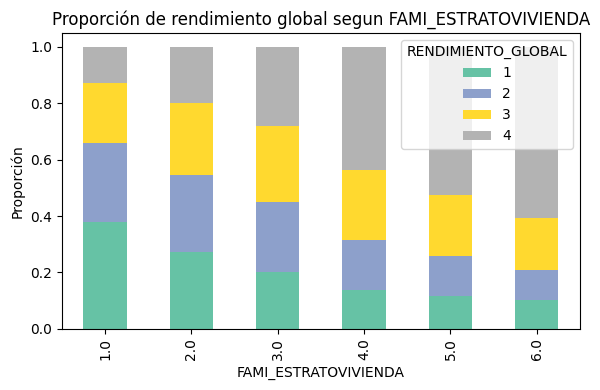

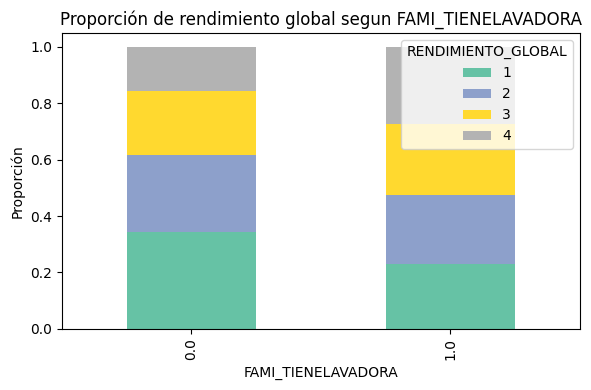

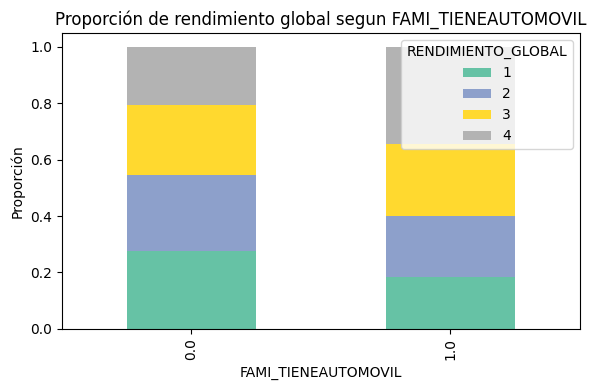

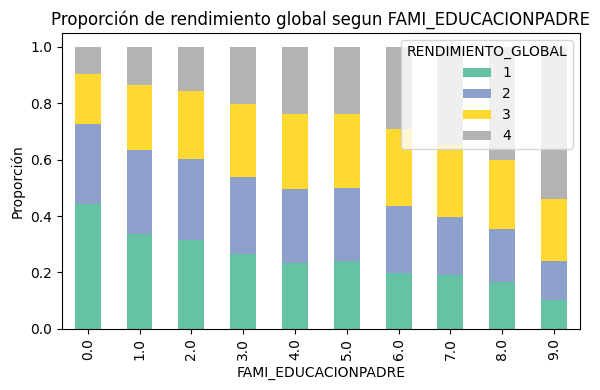

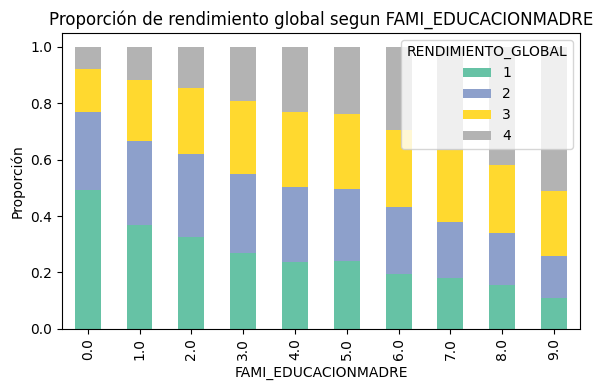

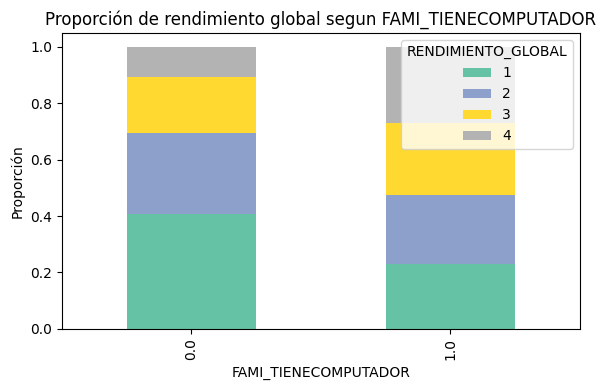

In [ ]:
cat_cols = ['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
            'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TIENECOMPUTADOR']

for col in cat_cols:
    ct = pd.crosstab(df[col], df['RENDIMIENTO_GLOBAL'], normalize='index')
    ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(6, 4))
    plt.title(f'Proporción de rendimiento global segun {col}')
    plt.ylabel('Proporción')
    plt.tight_layout()
    plt.show()


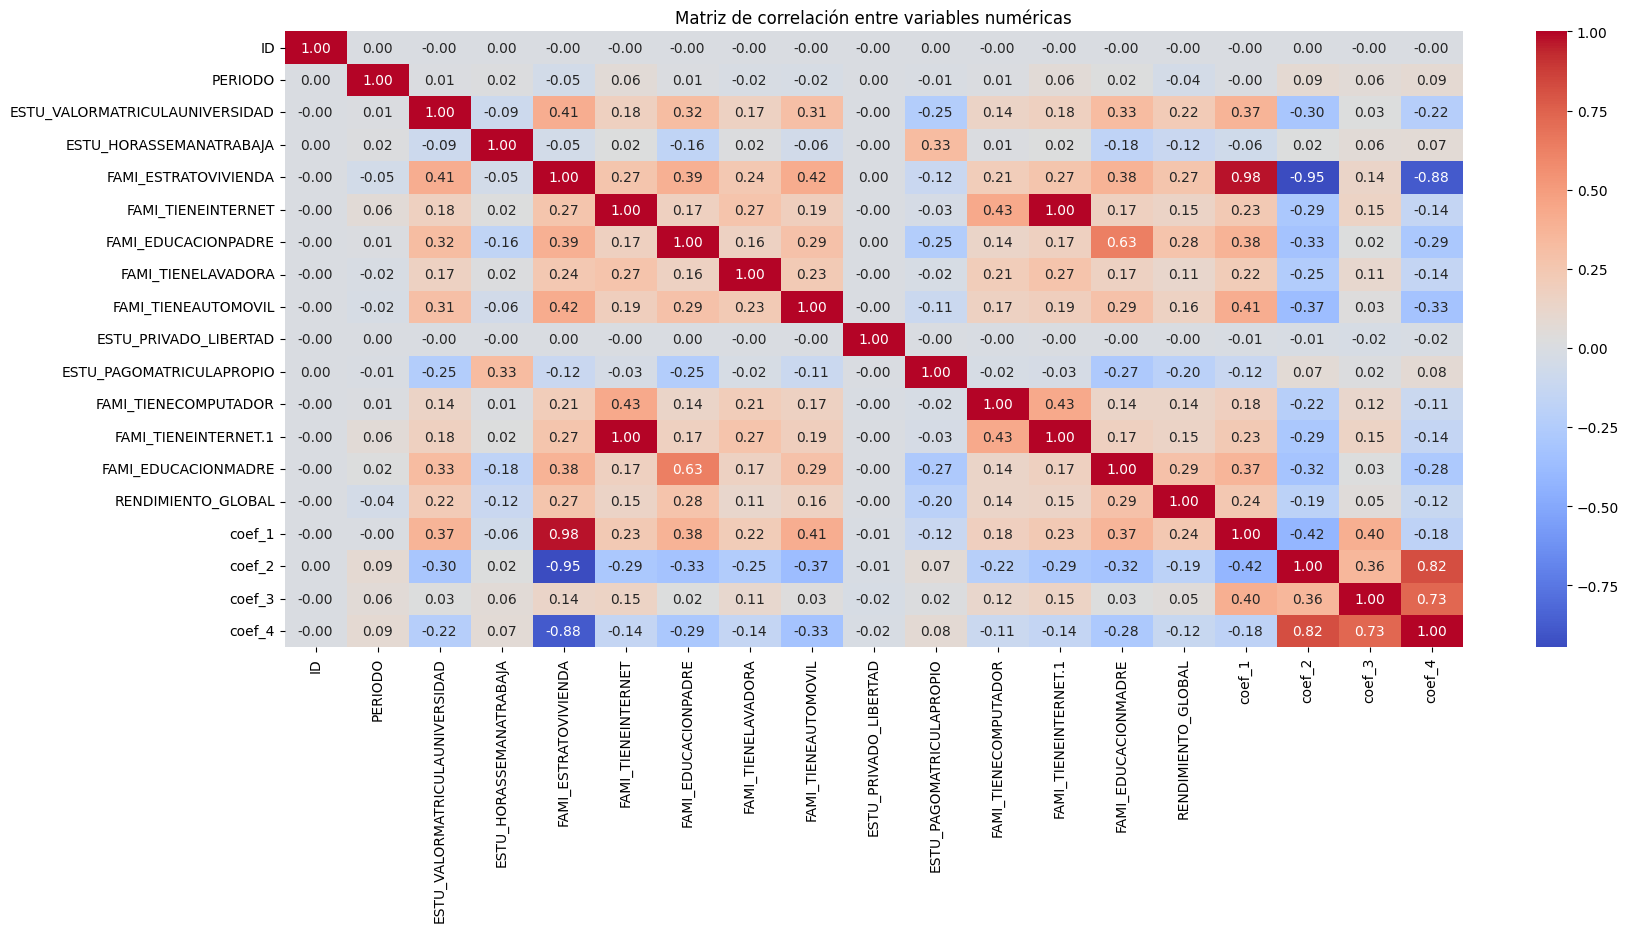

In [ ]:
# Solo columnas numéricas
num_cols = df.select_dtypes(include='number')

# Correlación
corr_matrix = num_cols.corr()

# Heatmap
plt.figure(figsize=(19, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# corrmat = df._get_numeric_data().corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

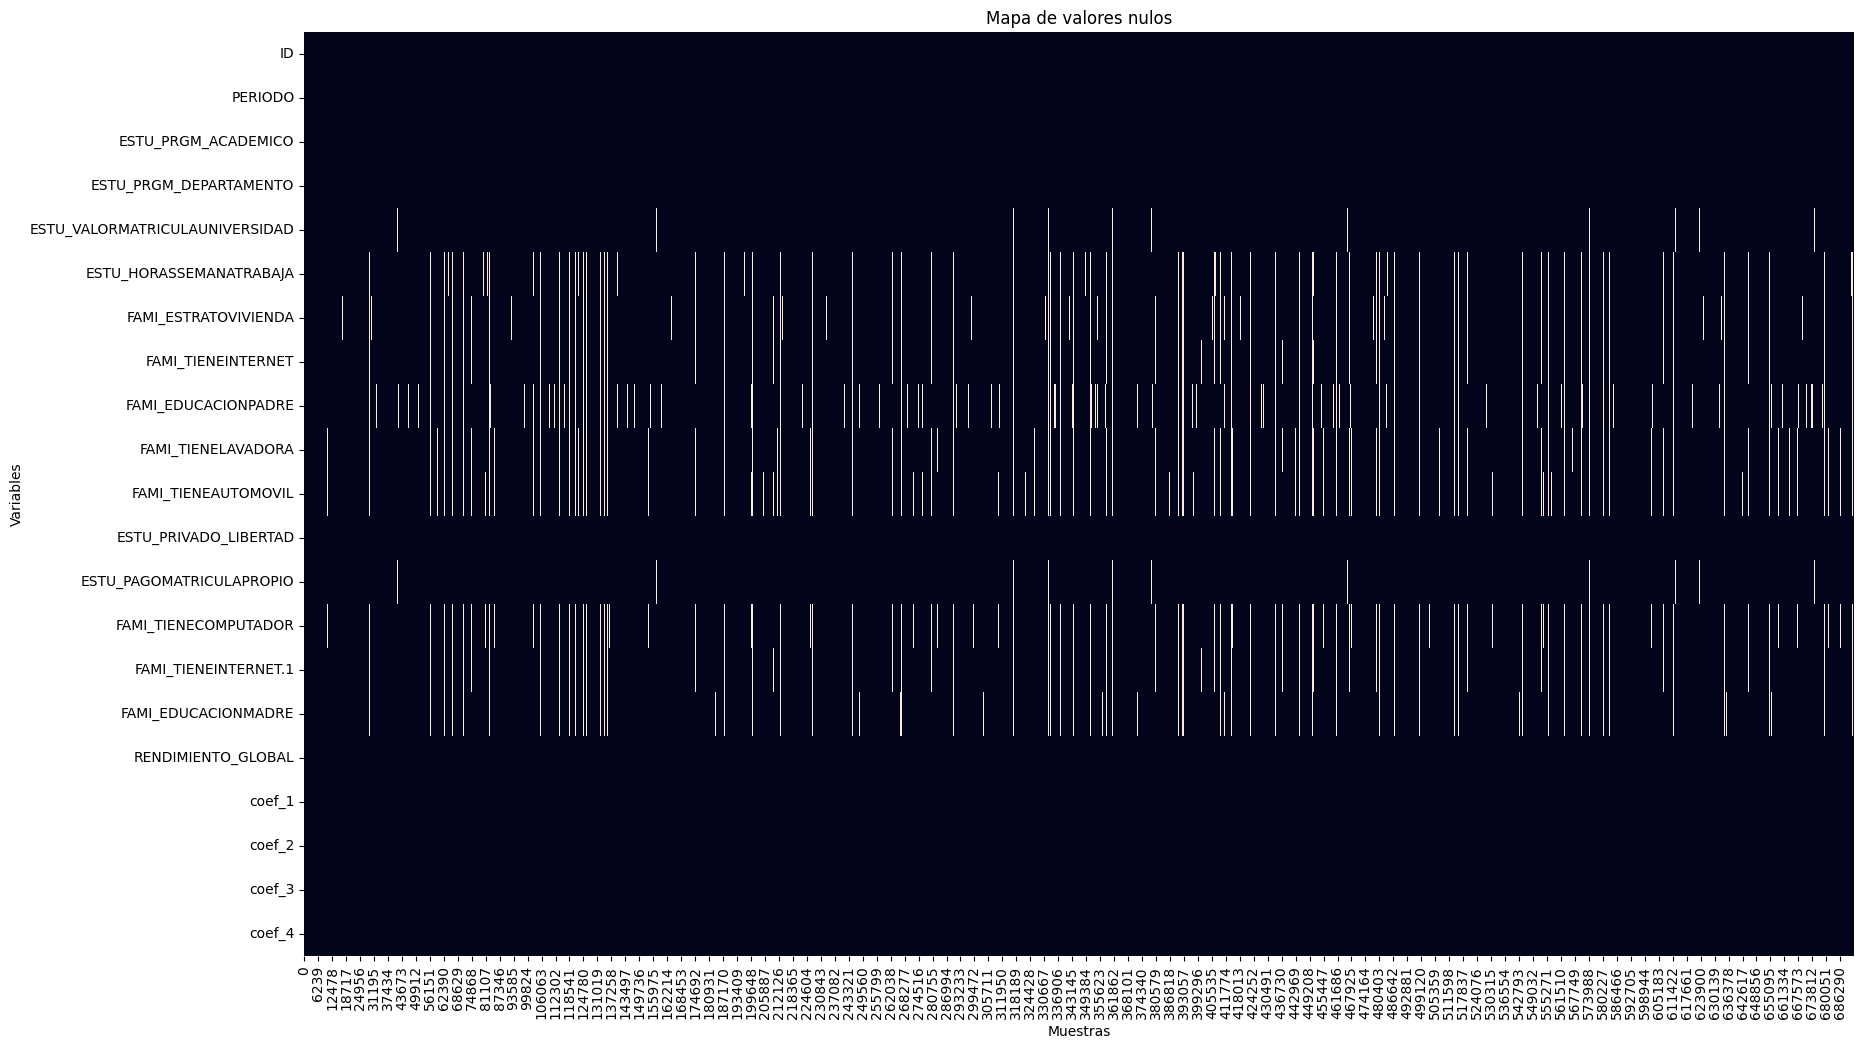

In [ ]:
# ax = plt.figure(figsize=(30,15)).add_subplot(111)
# ax.imshow(df.isna().values.T)
# ax.set_aspect(12)
# plt.yticks(range(df.shape[1]), df.columns);
plt.figure(figsize=(20, 12))
sns.heatmap(df.isna().T, cbar=False)
plt.xlabel("Muestras")
plt.ylabel("Variables")
plt.title("Mapa de valores nulos")
plt.show()

In [ ]:
for i in df['PERIODO'].unique():
  print(i)
df['PERIODO'].nunique()

20212
20203
20195
20183
20194
20213
20184
20202
20196


9

In [ ]:
for i in df['ESTU_PRGM_DEPARTAMENTO'].unique():
  print(i)
df['ESTU_PRGM_DEPARTAMENTO'].nunique()

BOGOTÁ
ATLANTICO
SANTANDER
ANTIOQUIA
HUILA
SUCRE
CAQUETA
CUNDINAMARCA
BOLIVAR
TOLIMA
VALLE
QUINDIO
RISARALDA
CORDOBA
META
LA GUAJIRA
BOYACA
NARIÑO
CAUCA
NORTE SANTANDER
CESAR
PUTUMAYO
CALDAS
MAGDALENA
CHOCO
CASANARE
ARAUCA
GUAVIARE
AMAZONAS
VAUPES
SAN ANDRES


31

In [ ]:
df['PERIODO'].describe()

,PERIODO
count,692500.000000
mean,20198.366679
std,10.535037
min,20183.000000
25%,20195.000000
50%,20195.000000
75%,20203.000000
max,20213.000000
